# Plotting Ballistic Ejecta from the South Pole-Aitken Impact

In [1]:
#import python packages 
import cartopy
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import the data file. Change the path to your file :) 
R0 = 1750
g0 = 0.00162

data = tools.load_ballistic_data("/Users/namya/Desktop/tracer_export_ff2.npz")

In [3]:
#get data
velocity_data = tools.get_velocity(data)
radial_distance_data = tools.get_radial_distance(data)
radial_velocity_data = tools.get_radial_velocity(data)
radial_acceleration_data = tools.get_radial_acceleration(data, radial_velocity_data)
average_time = tools.get_average_time(data)

In [4]:
#get the index of the tracer closest to the given cartesian coordinates
timestep = 0
xtarg = -800.0
ytarg = 0.0
ztarg = 1530.0
tracer_idx = tools.findTracer3D(data, timestep, xtarg, ytarg, ztarg)
print(tracer_idx)

11263


In [5]:
#condition to check if the tracer is ballistic. Also returns the first time step at which the condition is satisfied
h_launch = 150
check, time_step = tools.BallisticCheck(data, tracer_idx, h_launch)
ejection_time = data['time'][time_step]
print(check, ejection_time)

True 240.064697265625


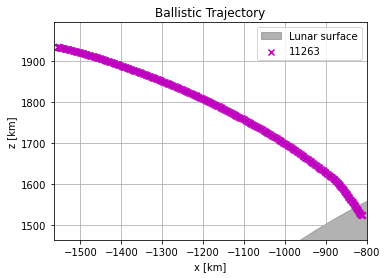

In [6]:
#plotting the x-z trajectory of the ballistic tracer
cartesian_trajec = tools.TrajectoryPlotCartesian(data, tracer_idx)

plt.savefig('Figures/trajectory.png', facecolor = 'w')

In [7]:
#use a smoothing filter to reduce the noise in the acceleration data
smooth_acceleration_data = tools.get_smooth_acceleration(radial_acceleration_data, tracer_idx, 25, 0.005)


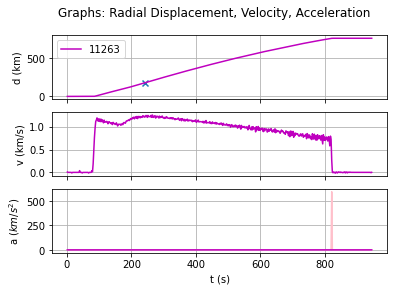

<Figure size 432x288 with 0 Axes>

In [8]:
#plotting the motion graphs for radial displacment, velocity, and acceleration

graphs = tools.MotionGraphs(average_time, radial_distance_data, radial_velocity_data, radial_acceleration_data,
smooth_acceleration_data['pred_med'], tracer_idx, [time_step])

plt.savefig('Figures/graphs.png')

In [9]:
v_tilda =tools.get_v_tilda(velocity_data,tracer_idx, 1750, 0.00162,time_step)
print(v_tilda)

0.799375572130264


In [10]:
v_r, longitude, latitude = tools.get_launch_vector(data,velocity_data, tracer_idx, time_step )
print(v_r)
print(latitude)
print(longitude)


1.3459452814205315
(60.48646841178773, 'N')
(179.9282941375784, 'E')


In [11]:
theta_launch, height, distance, azimuth, alpha, beta = tools.get_ballistic_vectors(data, velocity_data, tracer_idx, time_step, h_launch)

In [12]:
print(latitude[0], longitude[0], azimuth, distance)
final_latitude, final_longitude = tools.track(latitude[0], longitude[0], azimuth, distance)
print(final_latitude, final_longitude)

60.48646841178773 179.9282941375784 180.0 1210.6862010550174
20.848062905970856 179.9282941375784


In [13]:
def make_dataframe(tracer_idx, ejection_time, v_r, longitude, latitude, theta_launch, height, distance, final_longitude, final_latitude):
    initial_df = pd.DataFrame({'Tracer Index' : [tracer_idx], 'Ejection Time' : [ejection_time], 'Resultant Velocity' : [v_r], 'Launch Longitude' : [longitude[0]], 'Launch Latitude' : [latitude[0]], 'Launch Angle' : [theta_launch], 'Height' : [height], 'Distance' : [distance], 'Landing Longitude' : [final_longitude], 'Landing Latitude' : [final_latitude]})
    return initial_df

In [14]:
# df = make_dataframe(tracer_idx, ejection_time, v_r, longitude, latitude, theta_launch, height, distance, final_longitude, final_latitude)
# df.to_csv("tracer.csv", index=False)
tracer_df = pd.read_csv("tracer.csv")
tracer_df

,Tracer Index,Ejection Time,Resultant Velocity,Launch Longitude,Launch Latitude,Launch Angle,Height,Distance,Landing Longitude,Landing Latitude
0,11263,162.038696,1.065581,179.975408,61.562150,81.788474,465.154684,222.079007,180.279794,54.292960
1,11263,172.004898,1.078414,179.971531,61.500217,76.001109,470.559376,389.330651,180.373396,48.755368
2,11263,180.037796,1.139036,179.965674,61.428127,71.134255,528.924173,584.913282,179.965674,42.277806
3,11263,190.021606,1.228659,179.960023,61.301704,69.753492,652.079096,736.980951,179.960023,37.172619
4,11263,198.032700,1.295636,179.956412,61.181864,64.686338,732.409777,1022.437855,180.479630,27.708642
5,11263,280.022491,1.346901,179.902700,59.804995,64.764111,948.269590,1269.177405,180.462454,18.253531
6,11263,364.088898,1.339636,179.858848,58.312388,60.261254,1008.750906,1663.352051,180.479566,3.855667
7,11263,454.059692,1.258942,179.829218,56.726922,59.234492,918.377590,1723.292832,180.485929,0.308026
8,0,112.025597,3.567570,178.928060,68.623144,53.780778,-4165.526625,3747.565530,181.457366,-54.059631
9,0,112.025597,3.567570,178.928060,68.623144,53.780778,-4165.526625,3747.565530,181.457366,-54.059631


In [15]:
if check:
#     if tracer_idx in tracer_df['Tracer Index'].values:
#         index = np.where(tracer_df['Tracer Index'].values == (tracer_idx))[0][0]
#         tracer_df.at[index, 'Ejection Time'] = ejection_time
#         tracer_df.at[index, 'Resultant Velocity'] = v_r
#         tracer_df.at[index, 'Launch Longitude'] = longitude[0]
#         tracer_df.at[index, 'Launch Latitude'] = latitude[0]
#         tracer_df.at[index, 'Launch Angle'] = theta_launch
#         tracer_df.at[index, 'Height'] = height
#         tracer_df.at[index, 'Distance'] = distance
#         tracer_df.at[index, 'Landing Longitude'] = final_longitude
#         tracer_df.at[index, 'Landing Latitude'] = final_latitude
    
# else:
    df = make_dataframe(tracer_idx, ejection_time, v_r, longitude, latitude, theta_launch, height, distance, final_longitude, final_latitude)
    tracer_df = tracer_df.append(df, ignore_index=True)
        
tracer_df
    

,Tracer Index,Ejection Time,Resultant Velocity,Launch Longitude,Launch Latitude,Launch Angle,Height,Distance,Landing Longitude,Landing Latitude
0,11263,162.038696,1.065581,179.975408,61.562150,81.788474,465.154684,222.079007,180.279794,54.29296
1,11263,172.004898,1.078414,179.971531,61.500217,76.001109,470.559376,389.330651,180.373396,48.755368
2,11263,180.037796,1.139036,179.965674,61.428127,71.134255,528.924173,584.913282,179.965674,42.277806
3,11263,190.021606,1.228659,179.960023,61.301704,69.753492,652.079096,736.980951,179.960023,37.172619
4,11263,198.032700,1.295636,179.956412,61.181864,64.686338,732.409777,1022.437855,180.47963,27.708642
5,11263,280.022491,1.346901,179.902700,59.804995,64.764111,948.269590,1269.177405,180.462454,18.253531
6,11263,364.088898,1.339636,179.858848,58.312388,60.261254,1008.750906,1663.352051,180.479566,3.855667
7,11263,454.059692,1.258942,179.829218,56.726922,59.234492,918.377590,1723.292832,180.485929,0.308026
8,0,112.025597,3.567570,178.928060,68.623144,53.780778,-4165.526625,3747.565530,181.457366,-54.059631
9,0,112.025597,3.567570,178.928060,68.623144,53.780778,-4165.526625,3747.565530,181.457366,-54.059631


In [16]:
tracer_df.to_csv("tracer.csv", index=False)

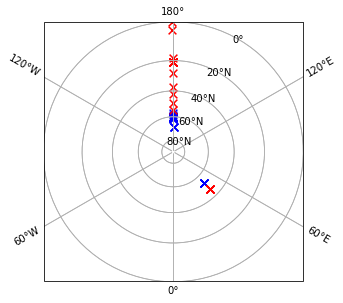

In [17]:
#plotting the tracers on a map in cartopy 

df_final = pd.read_csv('tracer.csv')


def main():
    fig = plt.figure(figsize=[8, 10])
    plt.tight_layout()
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.NorthPolarStereo())

    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())



    ax1.gridlines()

    

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    
    launch_longs = np.array(df_final['Launch Longitude'])
    launch_lats = np.array(df_final['Launch Latitude'])
    land_longs = np.array(df_final['Landing Longitude'])
    land_lats = np.array(df_final['Landing Latitude'])
    

    ax1.scatter(launch_longs, launch_lats,marker= 'x', s = 60, c = 'blue',  transform = ccrs.PlateCarree())
    ax1.scatter(land_longs, land_lats, marker = 'x', s = 60 ,c = 'red', transform =  ccrs.PlateCarree())
#     ax1.plot([180, 180], [60.8, 30.39],c ='k', transform=ccrs.Geodetic())
    ax1.gridlines(draw_labels = True)
    


    plt.savefig('Figures/11263_final.png' , dpi = 600, facecolor = 'w', bbox_inches = 'tight')


if __name__ == '__main__':
    main()

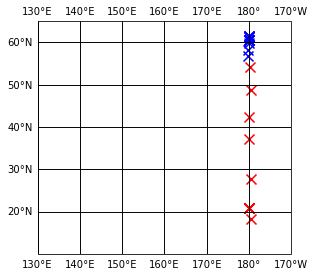

In [18]:
def moon_plot():
    fig = plt.figure(figsize=[10, 15])
    proj = ccrs.PlateCarree(central_longitude=180)
    ax = fig.add_subplot(1, 2, 1, projection=proj)
    

    # Limit the map to -60 degrees latitude and below.
    
    cm = 180
    minlon = -50 + cm
    maxlon = +10 + cm
    ax.set_extent([minlon, maxlon, 65, 10], ccrs.PlateCarree())
    
    
    launch_longs = np.array(df_final['Launch Longitude'])
    launch_lats = np.array(df_final['Launch Latitude'])
    land_longs = np.array(df_final['Landing Longitude'])
    land_lats = np.array(df_final['Landing Latitude'])
    

    ax.scatter(launch_longs, launch_lats, marker = 'x', s = 100, c = 'blue',  transform = ccrs.PlateCarree())
    ax.scatter(land_longs, land_lats, marker = 'x', s = 100 ,c = 'red', transform =  ccrs.PlateCarree())
    ax.gridlines(draw_labels = False, color = 'k', crs=ccrs.PlateCarree(), xlocs = [130, 140, 150, 160, 170, 180, 190])
    ax.gridlines(draw_labels = True, color = 'k', crs=ccrs.PlateCarree(), xlocs = [130, 140, 150, 160, 170, 180, -170])
    


    plt.savefig('Figures/11263_final_zoomed.png', dpi = 600, facecolor = 'w', bbox_inches = 'tight')


if __name__ == '__main__':
    moon_plot()

In [19]:
sx, sz = tools.parabolic_path(tracer_idx, time_step, theta_launch, beta, data, velocity_data, g0)

In [20]:
sx = sx + data['xmark'][tracer_idx, time_step] 
sz = sz + data['zmark'][tracer_idx, time_step]

print(sx , sz)

[ -936.82977295  -939.04359826  -941.25423134  -943.46167218
  -945.66592078  -947.86697715  -950.06484128  -952.25951318
  -954.45099283  -956.63928025  -958.82437544  -961.00627839
  -963.1849891   -965.36050757  -967.53283381  -969.70196781
  -971.86790958  -974.0306591   -976.1902164   -978.34658145
  -980.49975427  -982.64973485  -984.7965232   -986.94011931
  -989.08052318  -991.21773482  -993.35175422  -995.48258138
  -997.6102163   -999.73465899 -1001.85590945 -1003.97396766
 -1006.08883364 -1008.20050739 -1010.30898889 -1012.41427816
 -1014.5163752  -1016.61528    -1018.71099256 -1020.80351288
 -1022.89284097 -1024.97897682 -1027.06192043 -1029.14167181
 -1031.21823095 -1033.29159786 -1035.36177253 -1037.42875496
 -1039.49254515 -1041.55314311 -1043.61054883 -1045.66476232
 -1047.71578357 -1049.76361258 -1051.80824935 -1053.84969389
 -1055.8879462  -1057.92300626 -1059.95487409 -1061.98354968
 -1064.00903304 -1066.03132416 -1068.05042304 -1070.06632969
 -1072.0790441  -1074.08

0.5151083001056553
64.12745753462832


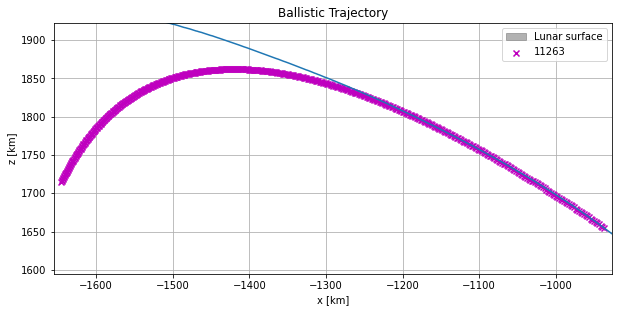

In [22]:
parabolic_plot = tools.ParabolicPlot(sx, sz, tracer_idx)
trajectory_x = data['xmark'][tracer_idx, :]
trajectory_z = data['zmark'][tracer_idx, :]
plt.plot(trajectory_x, trajectory_z)
# plt.xlim(-1000, -900)
# plt.ylim(1600, 1700)
print(beta[tracer_idx, time_step])
print(theta_launch)